# Car Price Prediction Machine Learning Project

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading and understanding the data
df=pd.read_csv('car.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
#understanding the shape of data
df.shape

(4345, 9)

In [4]:
#getting the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
#description about the data
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
#dropping model column as it has many unique categorical values which will be hard to interpret by the model
df.drop('Model',axis=1,inplace=True)

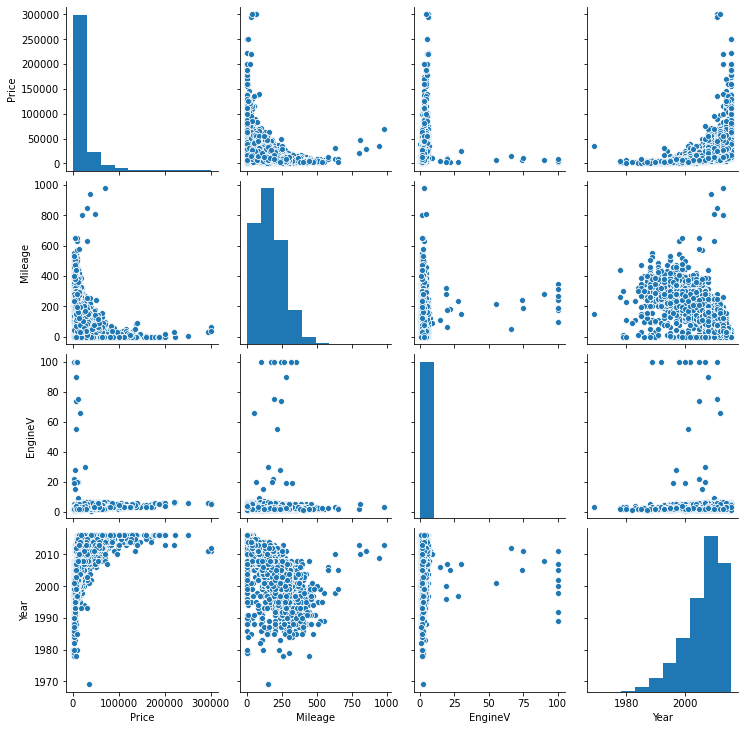

In [7]:
#visulalsing all the numerical attributes
import seaborn as sb
sb.pairplot(df)

The attributes are not linearly dependent on the target attributes i.e price So doing log transformation

In [10]:
#now it is following linear transformation
log_price = np.log(df['Price'])
df['Price']=log_price

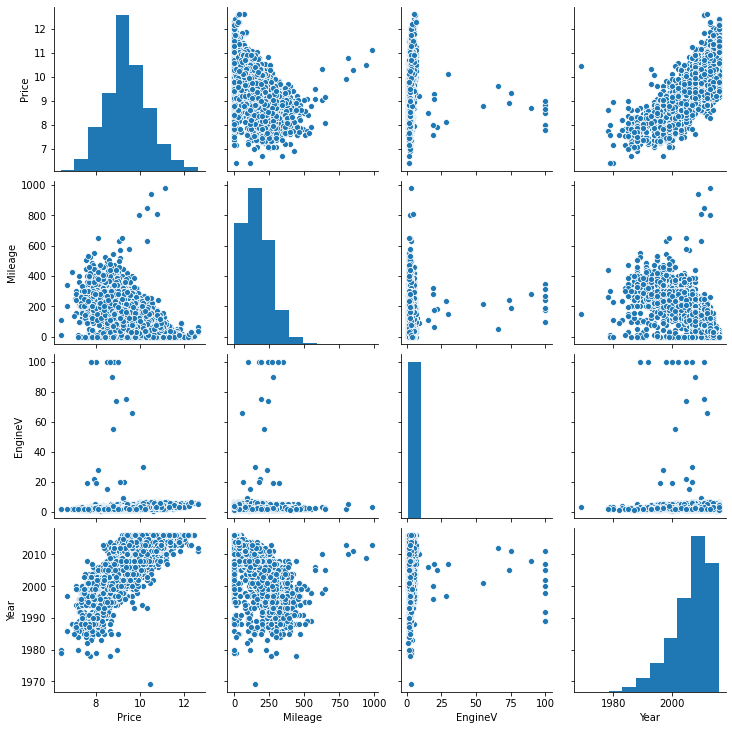

In [9]:
sb.pairplot(df)

In [12]:
#checking the null values
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
#checking the percentage of null values in Price 
172/len(df)*100

3.958573072497123

In [14]:
#we can drop the null values because it is below 4%
df.dropna(inplace=True)

In [15]:
#again checking the shape of the dataframe
df.shape

(4025, 8)

#### Checking For The Outliers

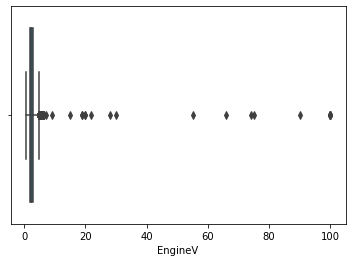

In [17]:
#checking outliers in EngineV attribute
import seaborn as sb
sb.boxplot(df.EngineV)

[1.8   2.2   3.2   4.    4.7   6.152]


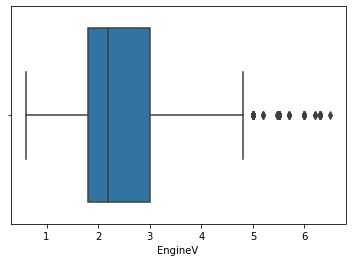

In [18]:
#Dropping the outliers
print(np.quantile(df.EngineV,[.25,.50,.85,.90,.95,.99]))
df=df[df.EngineV<6.7]
sb.boxplot(df.EngineV)

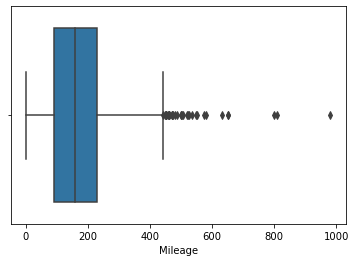

In [19]:
#checking outliers in Mileage attribute
sb.boxplot(df.Mileage)

In [128]:
#dropping the outliers in Mileage column
print(np.quantile(df.Mileage,[.25,.50,.85,.90,.95,.99]))
df=df[df.Mileage<430]
sb.boxplot(df.Mileage)

array([ 90.  , 158.  , 270.  , 297.  , 340.9 , 434.96])

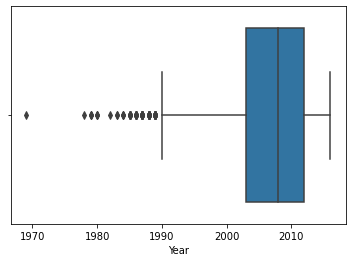

In [133]:
#checking outliers in Year attribute
sb.boxplot(df.Year)

[1999. 2008. 2003. 2008. 2012. 2016. 2016.]


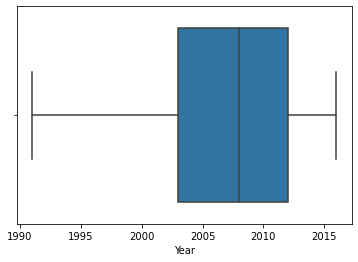

In [21]:
#removing the outliers in year attributes
print(np.quantile(df.Year,[.1,.5,.25,.50,.75,.95,.99]))
df=df[df['Year']>1990]
sb.boxplot(df.Year)

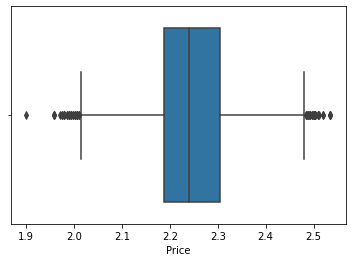

In [24]:
#checking outliers in Price attribute
sb.boxplot(df.Price)

[2.18708841 2.23903741 2.34110073 2.36513021 2.40544489 2.44769844
 2.46600259]


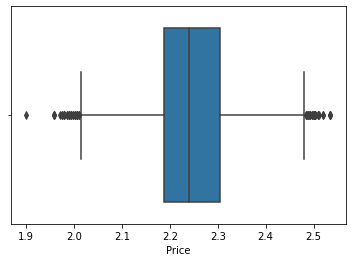

In [25]:
print(np.quantile(df.Price,[.25,.50,.85,.90,.95,.98,.99,]))
df=df[df.Price<100000]
sb.boxplot(df.Price)

In [28]:
#checking the shape of dataframe now
df.shape

(3885, 8)

### Feature Engineering Of Attributes

In [30]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,2.121404,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,2.194400,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,2.250820,sedan,358,5.0,Gas,yes,2003
3,Audi,2.306901,crossover,240,4.2,Petrol,yes,2007
4,Toyota,2.283877,crossover,120,2.0,Petrol,yes,2011


In [31]:
#transforming Registration into binary 
df.Registration =df.Registration.apply(lambda x: 1 if(x=='yes') else 0)

In [32]:
df['Engine Type'].value_counts()

Diesel    1831
Petrol    1403
Gas        553
Other       98
Name: Engine Type, dtype: int64

In [34]:
#creating dummy variables of Engine Type
engine=pd.get_dummies(df['Engine Type'])
engine

,Diesel,Gas,Other,Petrol
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
4338,1,0,0,0
4339,0,0,0,1
4340,1,0,0,0
4341,0,0,0,1


In [149]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,1,1991
1,Mercedes-Benz,8.974618,van,427,2.9,Diesel,1,1999
2,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,1,2003
3,Audi,10.043249,crossover,240,4.2,Petrol,1,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,1,2011


In [35]:
#creating dummy variables of Brand
brand=pd.get_dummies(df.Brand)

In [37]:
#creating dummy variables of Body
body=pd.get_dummies(df.Body)

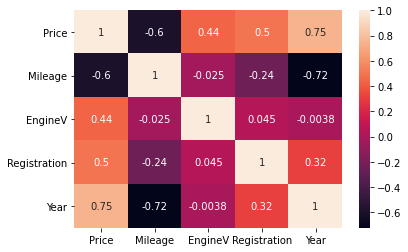

In [38]:
#checking the correlation between attributes 
sb.heatmap(df.corr(),annot=True)
df.drop('Year',axis=1,inplace=True)

In [39]:
#merging all the dummy variables
data=pd.concat([df,brand,body,engine],axis=1)

In [40]:
#looking at the head of the dataframe
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Audi,BMW,Mercedes-Benz,...,crossover,hatch,other,sedan,vagon,van,Diesel,Gas,Other,Petrol
0,BMW,2.121404,sedan,277,2.0,Petrol,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,Mercedes-Benz,2.194400,van,427,2.9,Diesel,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,Mercedes-Benz,2.250820,sedan,358,5.0,Gas,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,Audi,2.306901,crossover,240,4.2,Petrol,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Toyota,2.283877,crossover,120,2.0,Petrol,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [41]:
#dropping the unnecceassary columns
data.drop(['Brand','Body','Engine Type'],axis=1,inplace=True)

In [42]:
data.head()

,Price,Mileage,EngineV,Registration,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,...,crossover,hatch,other,sedan,vagon,van,Diesel,Gas,Other,Petrol
0,2.121404,277,2.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2.194400,427,2.9,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,2.250820,358,5.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2.306901,240,4.2,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,2.283877,120,2.0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [58]:
#splitting data into dependent and target features
a=data[::]
y=a.pop('Price')
X=a

### Feature Scaling

In [45]:
#importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
X.rename({'Mercedes-Benz':'Mercedes'},inplace=True,axis=1)

C:\Users\AKASH pc\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [46]:
col=['Mileage','EngineV']
X[col]

,Mileage,EngineV
0,277,2.0
1,427,2.9
2,358,5.0
3,240,4.2
4,120,2.0
...,...,...
4338,163,2.5
4339,35,1.6
4340,9,3.0
4341,1,3.5


In [60]:
#transforming the data
scaler=MinMaxScaler()
X[col]=scaler.fit_transform(X[col])

<ipython-input-60-f2cad79ae6b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=scaler.fit_transform(X[col])
C:\Users\AKASH pc\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [61]:
#performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=23)

### Model Building 

In [63]:
#importing Linear Regressoin and fitting the data into it
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [64]:
#predicting the data based on the model
y_pred=linear.predict(X_test)

In [65]:
#evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7625254138876767

#### Pickling the model

In [66]:
#dumping the model
import pickle 
pickle.dump(linear,open('car.pkl','wb'))

In [55]:
X_train.columns


Index(['Mileage', 'EngineV', 'Registration', 'Audi', 'BMW', 'Mercedes',
       'Mitsubishi', 'Renault', 'Toyota', 'Volkswagen', 'crossover', 'hatch',
       'other', 'sedan', 'vagon', 'van', 'Diesel', 'Gas', 'Other', 'Petrol'],
      dtype='object')

In [56]:
model=pickle.load(open('car.pkl','rb'))

In [57]:
model.predict([[377,2.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1]])

array([-168.8830744])